In [ ]:
#Obtain the number of pages to be ranked
print("Enter the number of pages : ")
n=int(input())
#Declare Pages Array to store Page names
pages=[]
#Accept the Page names
print("Enter the pages : ")
for i in range(n):
    #Store it in Pages array
    pages.append(input())

Enter the number of pages : 
3
Enter the pages : 
A
B
C


In [ ]:
#To store the directed links matrix
links=[]
#Obtain the inputs
#If there is a link directed from page i to page j
#Then enter 1
#Else enter 0
for i in range(n):
    print("Enter the links from",pages[i],":")
    x=[]
    for j in range(n):
        x.append(int(input()))
    links.append(x)

Enter the links from A :
0
1
1
Enter the links from B :
0
0
1
Enter the links from C :
1
0
0


In [ ]:
#Show the directed links matrix
#Horizontal rows implies link originates from that page
#Vertical columns implies link terminates at that page
for i in range(n):
    print(pages[i],end="  ")
print('\n')
for i in range(n):
    print(pages[i],end="  ")
    for j in range(n):
        print(links[i][j],end=" ")
    print('\n')

A  B  C  

A  0 1 1 

B  0 0 1 

C  1 0 0 



In [ ]:
#Damping factor
d=0.85
#Array ranks to store the page ranks
ranks=[]
#Initial ranks of the pages with value 1
for i in range(n):
    ranks.append(1)
#Enter the number of iterations needed to find the pageranks
print("Enter the number of iterations : ")
max=int(input())

Enter the number of iterations : 
2


In [ ]:
#Compute the number of outlinks from each page
outlinks=[]
for i in range(n):
    out=0
    for j in range(n):
        if links[i][j]==1:
            out+=1
    #Store the number of outlinks from each page in sorted manner
    outlinks.append(out)

In [ ]:
#Maximum iterations
for k in range(max):
    #For each column
    #To page i
    for i in range(n):
        rank=0
        #For each row
        #From page j
        for j in range(n):
            #To check inlink to page i from page j
            if links[j][i]==1:
                #If there is an inlink
                #Use the formula
                #PageRank(i) = d * (PageRank(j)/Outlinks(j))
                rank+=d*(ranks[j]/outlinks[j])
        #Add (1-d) to the rank
        rank+=1-d
        #Store the rank for this iteration
        ranks[i]=rank
    print("After Iteration",k+1," : ")
    print("The pageranks are : ")
    #Display the output
    for i in range(n):
        print(pages[i],end="  ")
        print(ranks[i])
    print('\n')

After Iteration 1  : 
The pageranks are : 
A  1.0
B  0.575
C  1.06375


After Iteration 2  : 
The pageranks are : 
A  1.0541874999999998
B  0.5980296875
C  1.106354921875




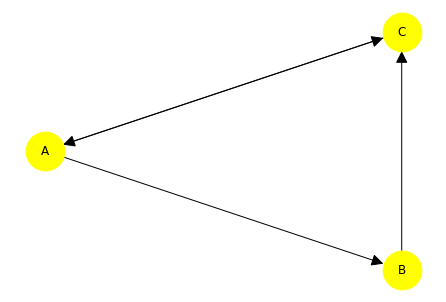

In [ ]:
#Importing Libraries to plot graph
import networkx as nx
import pylab as plt
#Create blank directed graph
D=nx.DiGraph()
#Feed page link to graph
for i in range(n):
    for j in range(n):
        if links[i][j]==1:
            #Add directed edges from one node to another
            D.add_weighted_edges_from([(pages[i],pages[j],1)])

#Display the graph
nx.draw_shell(D,with_labels=True,node_size=1500,node_color='yellow',arrowsize=25)
plt.show()